In [18]:
import generator
import numpy as np
import tensorflow as tf

batch_size = 1
gen = generator.gen(batch_size)
epochs = 500
regTerm = 0.001
classNum = 2
lr = 1e-5

class LinearClassifier:
    def __call__(self, x):  # predicting function
        return tf.sigmoid(tf.add(tf.matmul(x, self.Weight), self.Bias))

    def __init__(self):
        self.Weight = tf.Variable(0.0, shape=tf.TensorShape(None))  # initialize m to any shape
        self.Bias = tf.Variable(1.0)


def loss(y, pred):
    return y - pred

def train(model, x, y, lr):
    with tf.GradientTape(persistent=False) as t:  # persistent=True is needed if assigning dy_dWeight, dy_dBias in 2 lines. Limits the times u can call it to once
        current_loss = loss(y, LinearClassifier(x))
    dy_dWeight, dy_dBias = t.gradient(current_loss, [model.Weight, model.Bias])
    model.Weight.assign_add(lr * dy_dWeight)
    model.Bias.assign_add(lr * dy_dBias)

model = LinearClassifier()
sampleX, sampleY = next(gen)
model.Weight.assign([0.0] * sampleX.shape[-1])
for epoch_count in range(epochs):
    x, y  = next(gen)
    real_loss = loss(y, model(x))
    train(model, x, y, lr=lr)
    print(f"Epoch count {epoch_count}: Loss: {real_loss.numpy()}")
print(f'Weight: {model.Weight.numpy()}, Bias: {model.Bias.numpy()}')


InvalidArgumentError: In[1] ndims must be >= 2: 1 [Op:BatchMatMulV2]

W:tf.Tensor([4.575339  7.2419577], shape=(2,), dtype=float32)
b:tf.Tensor([0.005], shape=(1,), dtype=float32)
plot_y: tf.Tensor([-577.9977  -915.19476], shape=(2,), dtype=float32)


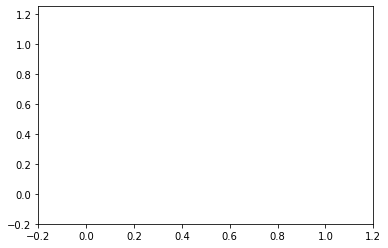

In [30]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import generator

gen = generator.gen(1000)
NUM_FEATURES = 2
NUM_ITER = 2000
learning_rate = 1e-2

sampleX, sampleY = next(gen)

W = np.zeros(NUM_FEATURES, np.float32) # 2x1, weight
b = np.zeros(1, np.float32) # 1x1

N, d = np.shape(x) # number of samples and number of features

# process each sample separately
for k in range(NUM_ITER):
   for j in range(N):
     yHat_j = tf.tensordot(x, W, 1)
     yHat_j = 1.0 / (1.0 + np.exp(-yHat_j))

     err = y[j] - yHat_j # error term
     deltaW = err * x[j, :]
     deltaB = err
     W = W + learning_rate * deltaW # if err = y - yHat, then W = W + lRate * deltW
     b = b + learning_rate * deltaB

# Now plot the fitted line. We need only two points to plot the line
plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
plot_y = - 1 / W[1] * (W[0] * plot_x + b) # comes from, w0*x + w1*y + b = 0 then y = (-1/w1) (w0*x + b)

print('W:' + str(W))
print('b:' + str(b))
print('plot_y: '+ str(plot_y))

plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='viridis')
plt.plot(plot_x, plot_y, color='k', linewidth=2)
plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
plt.show()